In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,mean_absolute_error,mean_squared_error

In [2]:
df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.shape

(418, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [7]:
df["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
mean_value=df['Age'].mean()
df['Age'].fillna(value=mean_value, inplace=True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
mean_value=df['Fare'].mean()
df['Fare'].fillna(value=mean_value, inplace=True)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [13]:
df.dropna(subset=['Cabin'], inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1101.978022,0.483516,1.164835,38.852641,0.571429,0.461538,94.903162
std,125.995853,0.502497,0.477580,14.991273,0.634960,0.847319,87.569238
min,904.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,1.000000,27.500000,0.000000,0.000000,30.100000
50%,1094.000000,0.000000,1.000000,37.000000,1.000000,0.000000,61.979200
75%,1213.500000,1.000000,1.000000,50.000000,1.000000,1.000000,134.500000
max,1306.000000,1.000000,3.000000,76.000000,3.000000,4.000000,512.329200


In [16]:
#remove unnessary columns
# Delete the 'Name', 'Sex', 'Cabin', and 'Embarked' columns
df.drop(['Name', 'Sex', 'Cabin', 'Embarked','Ticket'], axis=1, inplace=True)


In [17]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
12,904,1,1,23.0,1,0,82.2667
14,906,1,1,47.0,1,0,61.1750
24,916,1,1,48.0,1,3,262.3750
26,918,1,1,22.0,0,1,61.9792
28,920,0,1,41.0,0,0,30.5000


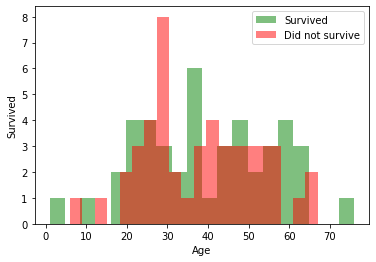

In [18]:
#survived vs not survivedd

x = df['Age']
survived = df['Survived']

plt.hist(x[survived == 1], label='Survived', alpha=0.5, bins=20, color='green')
plt.hist(x[survived == 0], label='Did not survive', alpha=0.5, bins=20, color='red')

plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend()

plt.show()

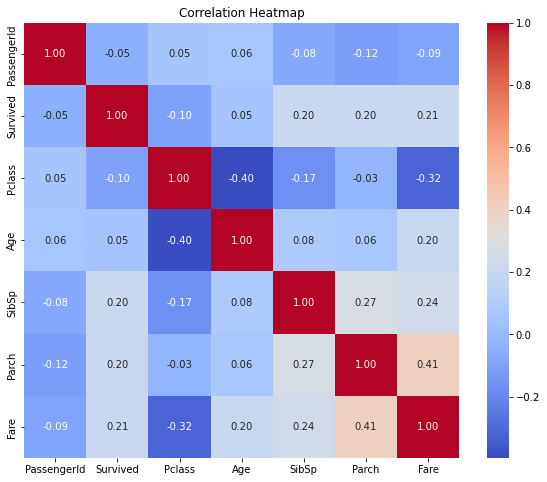

In [19]:
# Select the desired columns from your DataFrame
columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
data = df[columns]

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set the plot title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()


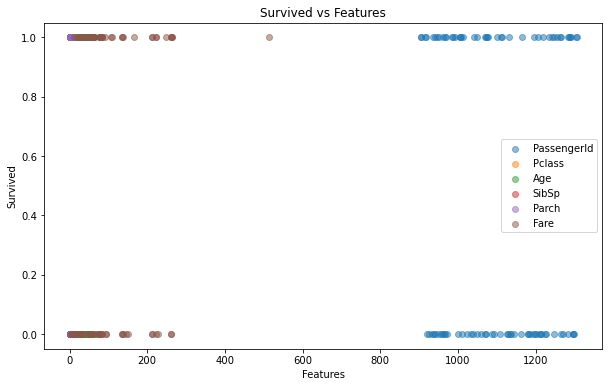

In [20]:
x_columns = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
y_column = 'Survived'

# Plot the graph
plt.figure(figsize=(10, 6))
for col in x_columns:
    plt.scatter(df[col], df[y_column], label=col, alpha=0.5)
plt.xlabel('Features')
plt.ylabel('Survived')
plt.title('Survived vs Features')
plt.legend()
plt.show()

# Train a model

In [21]:
x=df.drop("Survived",axis=1)

In [22]:
y=df["Survived"]

In [23]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
12,904,1,23.0,1,0,82.2667
14,906,1,47.0,1,0,61.1750
24,916,1,48.0,1,3,262.3750
26,918,1,22.0,0,1,61.9792
28,920,1,41.0,0,0,30.5000


In [24]:
y.head()

12    1
14    1
24    1
26    1
28    0
Name: Survived, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.20)

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(
)
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
lr.score(x_test,y_test)

0.5263157894736842

In [28]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [29]:
df2=pd.DataFrame({
    "actual":y_test,
    "predicted":y_pred
})
df2

,actual,predicted
270,0,0
81,0,1
156,1,0
24,1,1
96,1,1
59,1,1
69,1,1
64,0,1
331,0,0
395,1,0


In [30]:
accuracy_score(y_test,y_pred)

0.5263157894736842

In [31]:
confusion_matrix(y_test,y_pred)

array([[6, 2],
       [7, 4]], dtype=int64)

In [32]:
f1_score(y_test,y_pred)

0.4705882352941177

In [34]:
lr.coef_

array([[-0.00090635, -0.01458624,  0.0052784 ,  0.45288878,  0.35854781,
         0.00291782]])

In [35]:
lr.intercept_

array([-0.02268275])

In [36]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [37]:
def prediction_function(Age):
    z = 0.0052784 * Age - -0.02268275 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [38]:
age=30
prediction_function(age)

0.5451354838295038

In [39]:
age=60
prediction_function(age)

0.5840415494916775